# Auto ML experimentation

## 1.0 - Libraries

In [14]:
import pandas as pd
import numpy as np

import seaborn as sns

from pycaret.classification import *
from pycaret.datasets import get_data
from pycaret.utils import check_metric

## 2.0 - Data Extraction

In [2]:
# seeing all data availible sets
# all_dataset = get_data('index')

In [3]:
# getting the data 
df = get_data(dataset='income')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [4]:
# Splitting data for train, test and validation
df_train = df.sample(frac=0.95, random_state=786)
df_test = df.drop(df_train.index)

In [5]:
# removing index in creating a new sequence of index
df_train.reset_index(inplace=True, drop=True)
df_test.reset_index(inplace=True, drop=True)

In [6]:
# seeing the data dimentionality
df_train.shape, df_test.shape

((30933, 14), (1628, 14))

## 3.0 - Data Analysis

In [73]:
pd.concat([df_train.dtypes, df_train.head(3).T, df_train.describe(include='all', datetime_is_numeric=True).T], axis=1)

,0,0,1,2,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,int64,40,36,47,30933.0,NaN,NaN,NaN,38.585265,13.643714,17.0,28.0,37.0,48.0,90.0
workclass,object,Private,Private,Federal-gov,29207,8,Private,21578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,object,HS-grad,HS-grad,Some-college,30933,16,HS-grad,9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,int64,9,9,10,30933.0,NaN,NaN,NaN,10.08166,2.572671,1.0,9.0,10.0,12.0,16.0
marital-status,object,Separated,Married-civ-spouse,Married-civ-spouse,30933,7,Married-civ-spouse,14256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,object,Other-service,Other-service,Craft-repair,29200,14,Prof-specialty,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,object,Not-in-family,Husband,Husband,30933,6,Husband,12540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,object,White,White,White,30933,5,White,26445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,object,Female,Male,Male,30933,2,Male,20704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-gain,int64,0,0,0,30933.0,NaN,NaN,NaN,1072.027479,7345.058715,0.0,0.0,0.0,0.0,99999.0


<AxesSubplot:xlabel='income >50K', ylabel='count'>

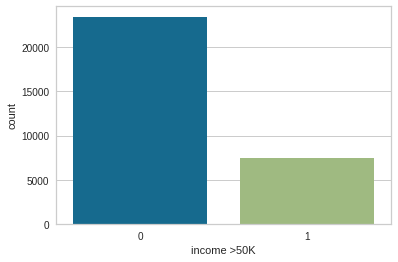

In [32]:
sns.countplot(df_train['income >50K'])

<AxesSubplot:xlabel='age', ylabel='Density'>

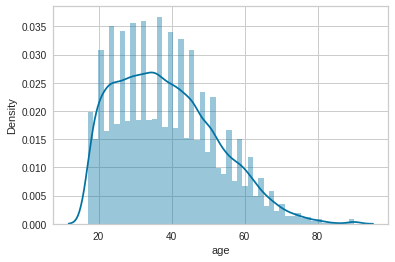

In [15]:
sns.distplot(df_train['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

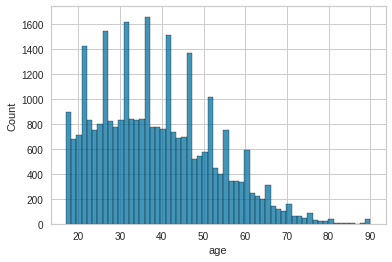

In [16]:
sns.histplot(df_train['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

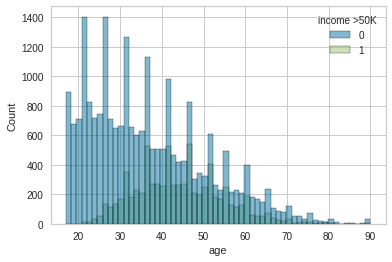

In [29]:
sns.histplot(x=df_train['age'], hue=df_train['income >50K'])

## 4.0 - Building Auto ML

### 4.1 - Setup

In [33]:
exp_o1 = setup(
    data=df_train, 
    target='income >50K', 
    session_id=123,
    n_jobs=2,
    imputation_type='simple',
    remove_outliers=True,
    fix_imbalance=True
)

,Description,Value
0,session_id,123
1,Target,income >50K
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(30933, 14)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


### 4.2 - Selecting the best model

In [34]:
# fix_imbalance SMOTE, remove_outliers
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8612,0.9238,0.7210,0.7113,0.7159,0.6241,0.6243,0.9740
gbc,Gradient Boosting Classifier,0.8439,0.9139,0.7544,0.6552,0.7012,0.5962,0.5991,3.8600
rf,Random Forest Classifier,0.8364,0.8847,0.6197,0.6787,0.6477,0.5415,0.5425,2.2910
ada,Ada Boost Classifier,0.8339,0.9073,0.7592,0.6319,0.6894,0.5774,0.5822,1.1450
et,Extra Trees Classifier,0.8200,0.8427,0.5883,0.6413,0.6135,0.4965,0.4974,3.3700
lr,Logistic Regression,0.8071,0.9024,0.8315,0.5707,0.6768,0.5460,0.5658,5.3230
dt,Decision Tree Classifier,0.8024,0.7458,0.5773,0.5963,0.5866,0.4568,0.4569,0.6390
ridge,Ridge Classifier,0.7801,0.0000,0.8503,0.5295,0.6525,0.5041,0.5345,0.5290
lda,Linear Discriminant Analysis,0.7801,0.8869,0.8503,0.5295,0.6525,0.5041,0.5345,0.8430
knn,K Neighbors Classifier,0.7758,0.8616,0.8171,0.5249,0.6391,0.4875,0.5127,3.2400


In [ ]:
# fill missing value by simple with mode and median
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8708,0.9250,0.6496,0.7745,0.7064,0.6244,0.6285,0.3270
gbc,Gradient Boosting Classifier,0.8628,0.9169,0.5736,0.7966,0.6667,0.5832,0.5958,2.0000
ada,Ada Boost Classifier,0.8588,0.9114,0.6062,0.7562,0.6726,0.5840,0.5900,0.5330
lr,Logistic Regression,0.8491,0.9019,0.5892,0.7289,0.6514,0.5565,0.5618,4.4090
rf,Random Forest Classifier,0.8419,0.8877,0.6062,0.6948,0.6473,0.5460,0.5482,1.4380
lda,Linear Discriminant Analysis,0.8392,0.8890,0.5576,0.7090,0.6239,0.5236,0.5299,0.4990
knn,K Neighbors Classifier,0.8385,0.8688,0.6174,0.6791,0.6466,0.5422,0.5434,2.0870
ridge,Ridge Classifier,0.8375,0.0000,0.4937,0.7416,0.5924,0.4961,0.5123,0.0700
et,Extra Trees Classifier,0.8226,0.8433,0.5720,0.6465,0.6068,0.4928,0.4945,2.0880
dt,Decision Tree Classifier,0.8128,0.7563,0.5946,0.6122,0.6032,0.4808,0.4809,0.1390


In [ ]:
# fill missing value by simple
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8714,0.9258,0.6525,0.7750,0.7083,0.6266,0.6305,0.2930
gbc,Gradient Boosting Classifier,0.8630,0.9175,0.5767,0.7949,0.6683,0.5847,0.5968,2.4310
ada,Ada Boost Classifier,0.8604,0.9119,0.6118,0.7588,0.6772,0.5894,0.5951,0.7060
lr,Logistic Regression,0.8497,0.9031,0.5909,0.7303,0.6531,0.5585,0.5638,4.9390
rf,Random Forest Classifier,0.8422,0.8886,0.6021,0.6977,0.6463,0.5455,0.5480,1.6970
knn,K Neighbors Classifier,0.8398,0.8699,0.6187,0.6829,0.6491,0.5456,0.5469,2.5540
lda,Linear Discriminant Analysis,0.8386,0.8902,0.5591,0.7059,0.6237,0.5228,0.5287,0.6460
ridge,Ridge Classifier,0.8379,0.0000,0.4953,0.7421,0.5938,0.4975,0.5136,0.0830
et,Extra Trees Classifier,0.8220,0.8452,0.5687,0.6458,0.6047,0.4904,0.4922,2.6670
dt,Decision Tree Classifier,0.8176,0.7609,0.5981,0.6242,0.6108,0.4917,0.4920,0.1650


In [ ]:
# fill missing value by iterative lightgbm
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8707,0.9252,0.6513,0.7733,0.7069,0.6248,0.6287,0.2370
gbc,Gradient Boosting Classifier,0.8633,0.9173,0.5807,0.7935,0.6705,0.5869,0.5984,2.0270
ada,Ada Boost Classifier,0.8599,0.9121,0.6114,0.7572,0.6762,0.5881,0.5938,0.6520
lr,Logistic Regression,0.8484,0.9024,0.5911,0.7255,0.6512,0.5557,0.5606,3.8100
rf,Random Forest Classifier,0.8425,0.8890,0.6044,0.6976,0.6475,0.5468,0.5492,1.6940
lda,Linear Discriminant Analysis,0.8387,0.8895,0.5582,0.7068,0.6235,0.5227,0.5288,0.5630
knn,K Neighbors Classifier,0.8385,0.8701,0.6179,0.6788,0.6468,0.5424,0.5435,2.4140
ridge,Ridge Classifier,0.8382,0.0000,0.4966,0.7428,0.5949,0.4988,0.5148,0.0810
et,Extra Trees Classifier,0.8234,0.8451,0.5726,0.6490,0.6083,0.4949,0.4966,2.3720
dt,Decision Tree Classifier,0.8124,0.7590,0.5969,0.6107,0.6037,0.4808,0.4809,0.1780


In [87]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8753,0.9340,0.6493,0.7929,0.7140,0.6353,0.6405
1,0.8666,0.9239,0.6281,0.7725,0.6929,0.6088,0.6141
2,0.8610,0.9159,0.6281,0.7512,0.6842,0.5960,0.5999
3,0.8734,0.9243,0.6525,0.7824,0.7116,0.6314,0.6356
4,0.8725,0.9185,0.6583,0.7750,0.7119,0.6307,0.6342
5,0.8790,0.9248,0.6564,0.8019,0.7219,0.6455,0.6508
6,0.8674,0.9262,0.6564,0.7572,0.7032,0.6184,0.6210
7,0.8781,0.9359,0.6892,0.7761,0.7301,0.6517,0.6536
8,0.8628,0.9204,0.6281,0.7581,0.6870,0.6002,0.6045


In [91]:
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### 4.3 - Tuning Model

In [88]:
tuned_lgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8735,0.9301,0.6301,0.7995,0.7047,0.6257,0.6329
1,0.8633,0.9195,0.6127,0.7700,0.6824,0.5968,0.6031
2,0.8629,0.9179,0.6185,0.7643,0.6837,0.5974,0.6029
3,0.8739,0.9226,0.6506,0.7855,0.7117,0.6319,0.6365
4,0.8688,0.9165,0.6409,0.7721,0.7004,0.6174,0.6218
5,0.8688,0.9211,0.6332,0.7773,0.6979,0.6152,0.6205
6,0.8656,0.9225,0.6467,0.7562,0.6972,0.6115,0.6146
7,0.8808,0.9350,0.6873,0.7876,0.7340,0.6577,0.6602
8,0.8610,0.9198,0.6262,0.7523,0.6835,0.5954,0.5995


In [92]:
params = {
    'n_estimators': np.arange(100,1500,50),
    'max_depth': [-1,3,5,7,10,12],
    'num_leaves': np.arange(3,120,5)
}

In [93]:
tuned_lgbm2 = tune_model(lgbm, custom_grid=params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8777,0.9336,0.6397,0.8098,0.7147,0.6382,0.6454
1,0.8680,0.9249,0.6320,0.7754,0.6964,0.6131,0.6184
2,0.8583,0.9151,0.6050,0.7548,0.6717,0.5827,0.5885
3,0.8744,0.9232,0.6622,0.7795,0.7161,0.6361,0.6396
4,0.8702,0.9195,0.6525,0.7699,0.7064,0.6238,0.6273
5,0.8744,0.9246,0.6602,0.7808,0.7155,0.6356,0.6393
6,0.8684,0.9247,0.6583,0.7595,0.7053,0.6211,0.6237
7,0.8771,0.9355,0.6950,0.7692,0.7302,0.6509,0.6523
8,0.8587,0.9182,0.6185,0.7483,0.6772,0.5878,0.5921


### 4.4 - Performance

In [13]:
df_train.isna().sum()

age                  0
workclass         1726
education            0
education-num        0
marital-status       0
occupation        1733
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     558
income >50K          0
dtype: int64

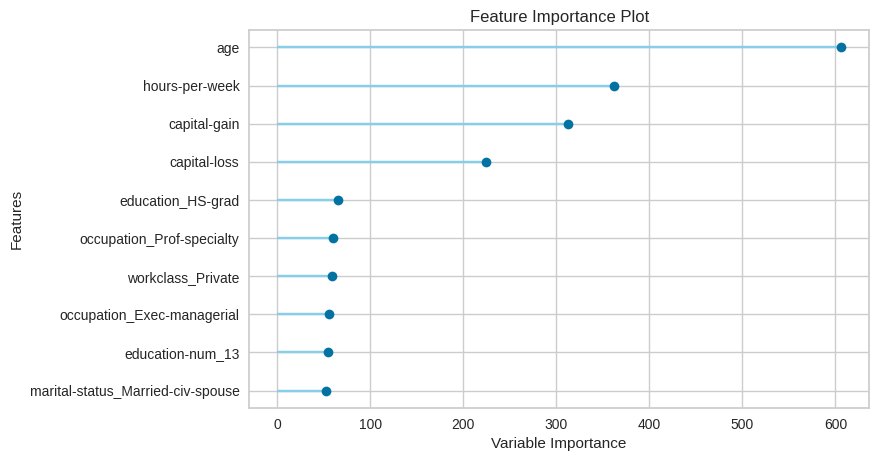

In [94]:
plot_model(lgbm, plot='feature')

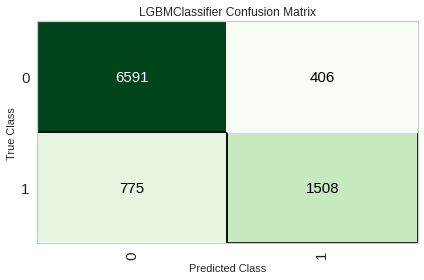

In [95]:
plot_model(lgbm, 'confusion_matrix')

In [96]:
evaluate_model(lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 4.4 - Validation

In [ ]:
# predictin with train and test data
predict_model(lgbm)

In [98]:
# predicting the data of validation
pred_valid = predict_model(lgbm, data=df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8864,0.9361,0.7051,0.7781,0.7398,0.6673,0.6687


In [99]:
# Validation with data validation
check_metric(actual=pred_valid['income >50K'], prediction=pred_valid['Label'], metric='Accuracy')

0.8864

### 4.5 - Final model

In [100]:
# creating a model to deploy
final_lgbm = finalize_model(lgbm)

In [101]:
# creating a object serialized to deploy
save_model(final_lgbm, 'final_lgbm_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='income >50K', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20

In [104]:
lgbm_deploy = pd.read_pickle('final_lgbm_model.pkl')

## 5.0 - Deploy

In [2]:
# commando to start server fo Mlflow
# !mlflow ui